### English Premier League data

- Dataset link: https://github.com/insaid2018/Term-1/blob/master/Data/Projects/English_Premier_League.csv

### Problem Statement
___

To explore the **English Premier League** data, so as to understand how it has fared across different seasons and evolved over the years. Analysis can help to determine **trends in league over a season** from August to May.

#### To perform analysis on:
  * Performance of teams over the years
  * Goal scoring behavior of teams
  * League progress over a season

#### To determine:
  * How to sustain in the league?
  * How to win the league?
  * What are the shortcomings in the league? And suggest suitable changes to improve the league conditions.  

## Dataset Description



Description of the Dataset

- This dataset contains results from every Premier League match from 1993-1994 to 2017-2018. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.


| Column Name        | Description                                                                                            |
| :----------------- | :----------------------------------------------------------------------------------------------------- |
| Div                | The division the match was played in.                                                                  | 
| Date               | The date the match was played.                                                                         | 
| HomeTeam           | The name of the home team.                                                                             | 
| AwayTeam           | The name of the away team.                                                                             |
| FTHG               | The total number of goals scored by the home team during the match at full time.                       |
| FTAG               | The total number of goals scored by the away team during the match at full time.                       |
| FTR                | The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).                  |
| HTHG               | The total number of goals scored by the home team at half time.                                        |
| HTAG               | The total number of goals scored by the away team at half time.                                        |
| HTR                | The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).      |
| Season             | The season in which the match was played.                                                              |

## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
import seaborn as sns

In [ ]:
import pdb
import re
import pandas_profiling

## Import Dataset

<p style="color:red;">Change dataset source before submission</p>

In [ ]:
df_epl=pd.read_csv("English_Premier_League.csv")

### Glancing at Dataset

In [ ]:
df_epl.head()

In [ ]:
df_epl.tail()

In [ ]:
df_epl.info()

In [ ]:
df_epl.describe(include='all')

## Pre-profiling Dataset

## Pre processing

In [ ]:
profile = df_epl.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")

##### Dropping 'Div' (constant value), 'Date' and dropping data of 1993-94 and 1994-95 seasons since it doesn't have HT values and no of matches played in season differ from the rest 23 seasons

In [ ]:
df_epl.drop(df_epl[df_epl.HTR.isnull()].index,inplace=True)
df_epl.reset_index(inplace=True)

In [ ]:
df_epl['Date']=pd.to_datetime(df_epl.Date,dayfirst=True)

In [ ]:
df_epl.drop(['index','Div'],axis=1,inplace=True)

In [ ]:
df_epl[['HTHG','HTAG','FTHG','FTAG']]=df_epl[['HTHG','HTAG','FTHG','FTAG']].astype('int16')

In [ ]:
df_epl.info()

## Post-profiling Dataset

In [1]:
profile1 = df_epl.profile_report(title='Pandas Profiling after Data Preprocessing')
profile1.to_file(output_file="profiling_after_preprocessing.html")

NameError: ignored

### Generate Season Wise Points Table

In [ ]:
Points_Table_Full_Season=pd.DataFrame(columns=['MP','W','D','L','GF','GA','GD','Pts','Season'])
Points_Table_Half_Season=pd.DataFrame(columns=['MP','W','D','L','GF','GA','GD','Pts','Season'])
winners_list=[]
half_winners_list=[]

In [ ]:
#Group Data by seasons
Season_wise_df=df_epl.groupby('Season')
for i in df_epl.Season.unique():
    df_season=Season_wise_df.get_group(i)
    TeamDict = {k:v for k,v in zip(df_season.HomeTeam.unique(),range(0,20))} 
    array=np.zeros((20,8),dtype='int16')
    
    result_points={'H':3,'D':1,'A':0}
    result_points1={'H':0,'D':1,'A':3}
    result_pos={'H':1,'D':2,'A':3}
    result_pos1={'H':3,'D':2,'A':1}
    
    for j in df_season.loc[df_season.index[0]:df_season.index[0]+189,:].iterrows():
        array[TeamDict[j[1].HomeTeam]][[0,result_pos[j[1].FTR],4,5,7]]+=[1,1,j[1].FTHG,j[1].FTAG,result_points[j[1].FTR]]
        array[TeamDict[j[1].AwayTeam]][[0,result_pos1[j[1].FTR],4,5,7]]+=[1,1,j[1].FTAG,j[1].FTHG,result_points1[j[1].FTR]]
    array[:,6]=array[:,4]-array[:,5]
    df_points_table=pd.DataFrame(array,index=df_season.HomeTeam.unique(),columns=['MP','W','D','L','GF','GA','GD','Pts']).sort_values('Pts',ascending=False)
    df_points_table.loc[:,'Season']=i
    half_winners_list.append(df_points_table.Pts.idxmax())
    Points_Table_Half_Season=Points_Table_Half_Season.append(df_points_table)
    
    array=np.zeros((20,8),dtype='int16')
    for j in df_season.iloc:
        array[TeamDict[j.HomeTeam]][[0,result_pos[j.FTR],4,5,7]]+=[1,1,j.FTHG,j.FTAG,result_points[j.FTR]]
        array[TeamDict[j.AwayTeam]][[0,result_pos1[j.FTR],4,5,7]]+=[1,1,j.FTAG,j.FTHG,result_points1[j.FTR]]
        
    array[:,6]=array[:,4]-array[:,5]
    
    df_points_table=pd.DataFrame(array,index=df_season.HomeTeam.unique(),columns=['MP','W','D','L','GF','GA','GD','Pts']).sort_values('Pts',ascending=False)
    df_points_table.loc[:,'Season']=i
    winners_list.append(df_points_table.Pts.idxmax())
    Points_Table_Full_Season=Points_Table_Full_Season.append(df_points_table)
winners_list=np.array(winners_list)

### Generate Home and Away Points Table

In [ ]:
Points_Table_Home=pd.DataFrame(columns=['MP','W','D','L','GF','GA','GD','Pts','Season'])
Points_Table_Away=pd.DataFrame(columns=['MP','W','D','L','GF','GA','GD','Pts','Season'])

In [ ]:
#Group Data by seasons
Season_wise_df=df_epl.groupby('Season')
for i in df_epl.Season.unique():
    df_season=Season_wise_df.get_group(i)
    TeamDict = {k:v for k,v in zip(df_season.HomeTeam.unique(),range(0,20))} 
    array=np.zeros((20,8),dtype='int16')
    array1=np.zeros((20,8),dtype='int16')
    result_points={'H':3,'D':1,'A':0}
    result_points1={'H':0,'D':1,'A':3}
    result_pos={'H':1,'D':2,'A':3}
    result_pos1={'H':3,'D':2,'A':1}
    for j in df_season.iloc:
        array[TeamDict[j.HomeTeam]][[0,result_pos[j.FTR],4,5,7]]+=[1,1,j.FTHG,j.FTAG,result_points[j.FTR]]
        array1[TeamDict[j.AwayTeam]][[0,result_pos1[j.FTR],4,5,7]]+=[1,1,j.FTAG,j.FTHG,result_points1[j.FTR]]
    array[:,6]=array[:,4]-array[:,5]
    array1[:,6]=array1[:,4]-array1[:,5]
    df_points_table=pd.DataFrame(array,index=df_season.HomeTeam.unique(),columns=['MP','W','D','L','GF','GA','GD','Pts']).sort_values('Pts',ascending=False)
    df_points_table.loc[:,'Season']=i
    Points_Table_Home=Points_Table_Home.append(df_points_table)
    
    df_points_table1=pd.DataFrame(array1,index=df_season.HomeTeam.unique(),columns=['MP','W','D','L','GF','GA','GD','Pts']).sort_values('Pts',ascending=False)
    df_points_table1.loc[:,'Season']=i
    Points_Table_Away=Points_Table_Away.append(df_points_table1)
    

<p style="color:red;">Deallocate memory used above</p>

In [ ]:
del df_points_table,df_points_table1,result_points1,result_points,result_pos,result_pos1,i,j,df_season,array,array1,TeamDict

## EDA

### <b style="color:#941AB1;">Theme 1 : Teams</b>

#### Teams Win Rate

In [ ]:
season_teams=Season_wise_df.HomeTeam.unique()
all_seasons_teams=pd.Series(np.concatenate(season_teams))

In [ ]:
allteams_ever=all_seasons_teams.drop_duplicates()

In [ ]:
df_overall_tb=pd.DataFrame(np.zeros((48,2)),columns=['MP','W'],index=allteams_ever)

In [ ]:
for season in Yearly_PT_Srs:
    MP=W=0
    for team in allteams_ever:
        if team in season.index:
            df_overall_tb.loc[team]+=[season.loc[team,'MP'],season.loc[team,'W']]

In [ ]:
overall_win_perc=(df_overall_tb.W/df_overall_tb.MP).sort_values(ascending=False)*100

Text(0, 0.5, 'Win Percentage')

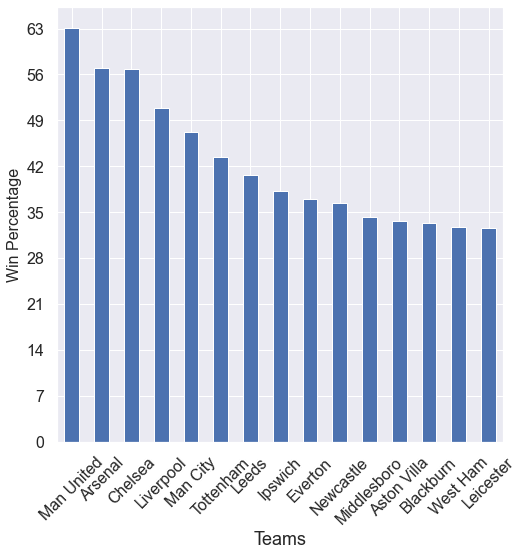

In [ ]:
# sns.barplot(x=overall_win_perc[:15].index,y=overall_win_perc[:15].values)
# grph.set_xticklabels(grph.get_xticklabels(),rotation=45)
# b.axes.set_title("Title",fontsize=50)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
overall_win_perc[:15].plot.bar(figsize=(8,8),fontsize=16,yticks=range(0,70,7))
plt.xlabel('Teams', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Win Percentage', fontsize=16)

### <b style="color:#009900;">Insights</b>
<li>Man U has highest win percentage of 63% over 23 seasons</li>
<li>Followed by Arsenal (56.9%), Chelsea (56.8)% and Liverpool (51%)</li>

#### Teams that have been in top tier

Text(0, 0.5, 'Seasons')

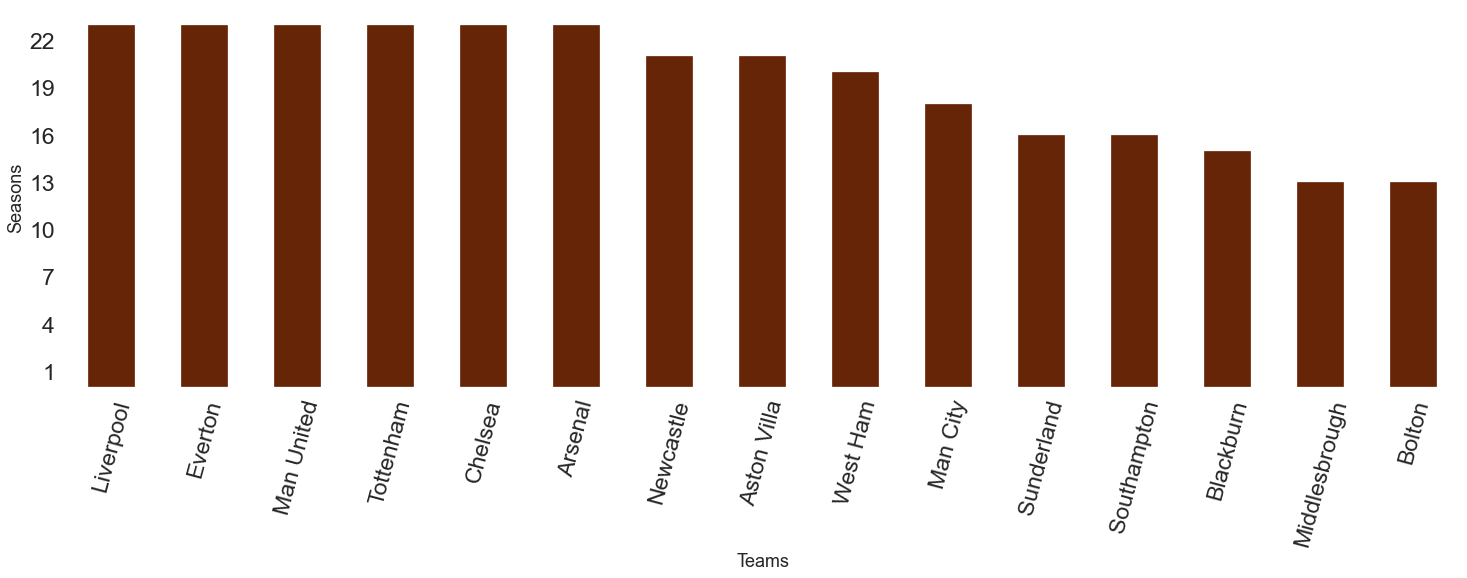

In [ ]:
team_season_count=all_seasons_teams.value_counts(sort=True)

team_season_count[:15].plot(kind='bar',yticks=range(1,24,3),colormap='YlOrBr_r',figsize=(25,7),fontsize=23)
plt.xticks(rotation=75)
plt.xlabel('Teams',fontsize=18)
plt.ylabel('Seasons',fontsize=18)

In [ ]:
never_relegated_teams=team_season_count[:6].index

### <b style="color:#009900;">Insights</b>
<li>Everton, Man U, Liverpool, Chelsea, Tottenham and Arsenal have never been relegated</li>

### <b style="color:#941AB1;">What was win percentage of winners across seasons?</b>

In [ ]:
winner_win_perc_over_seasons=pd.Series(index=Yearly_PT_Srs.index,dtype='float64')
for year,i in zip(Yearly_PT_Srs,range(0,23)):
    winner_win_perc_over_seasons[i]=year.iloc[0,1]*100/year.iloc[0,0]

Text(0, 0.5, 'Win %')

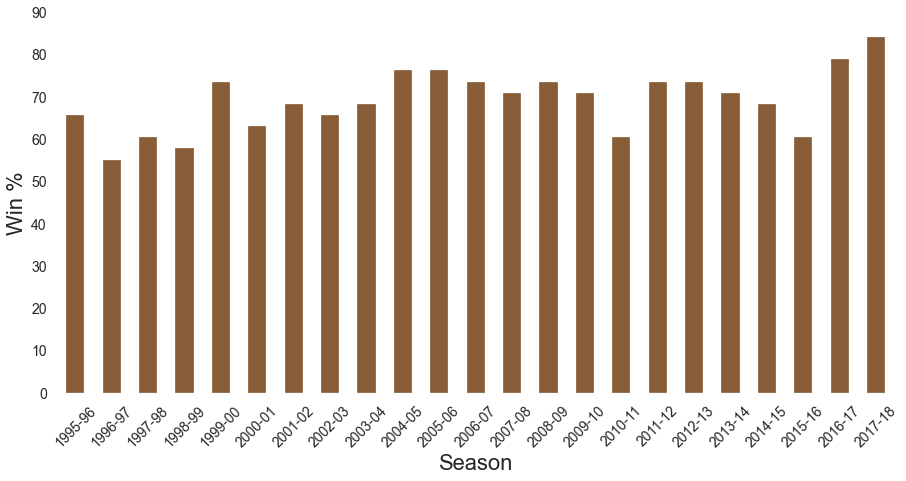

In [ ]:
winner_win_perc_over_seasons.plot(kind='bar',figsize=(15,7), color='#875C36', fontsize=14, yticks=range(0,100,10))
plt.xticks(rotation=45)
plt.xlabel('Season',fontsize=22)
plt.ylabel('Win %',fontsize=22)

### <b style="color:#941AB1;">What was Loss percentage of winners across seasons?</b>

In [ ]:
winner_loss_perc_over_seasons=pd.Series(index=Yearly_PT_Srs.index,dtype='float64')
for year,i in zip(Yearly_PT_Srs,range(0,23)):
    winner_loss_perc_over_seasons[i]=year.iloc[0,3]*100/year.iloc[0,0]

Text(0, 0.5, 'Loss %')

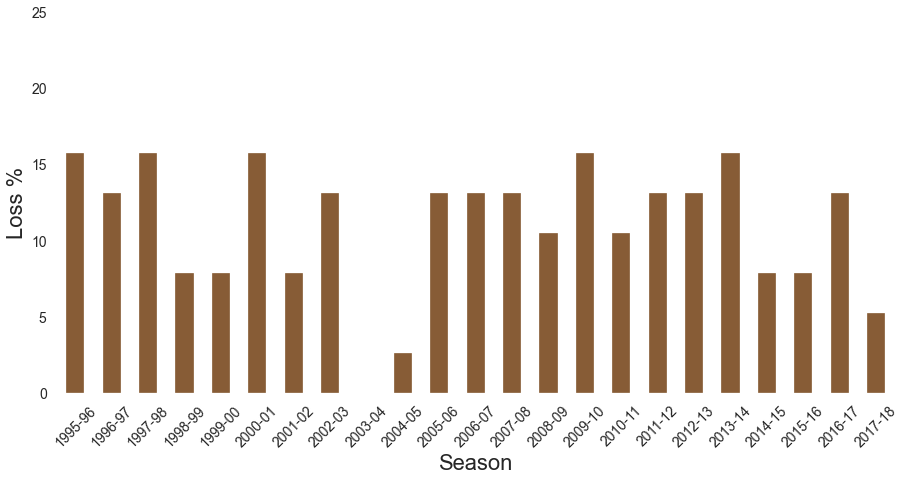

In [ ]:
winner_loss_perc_over_seasons.plot(kind='bar',figsize=(15,7), color='#875C36', fontsize=14, yticks=range(0,30,5))
plt.xticks(rotation=45)
plt.xlabel('Season',fontsize=22)
plt.ylabel('Loss %',fontsize=22)

### <b style="color:#941AB1;">What was draw percentage of winners across seasons?</b>

In [ ]:
winner_draw_perc_over_seasons=pd.Series(index=Yearly_PT_Srs.index,dtype='float64')
for year,i in zip(Yearly_PT_Srs,range(0,23)):
    winner_draw_perc_over_seasons[i]=year.iloc[0,2]*100/year.iloc[0,0]

Text(0, 0.5, 'Draw %')

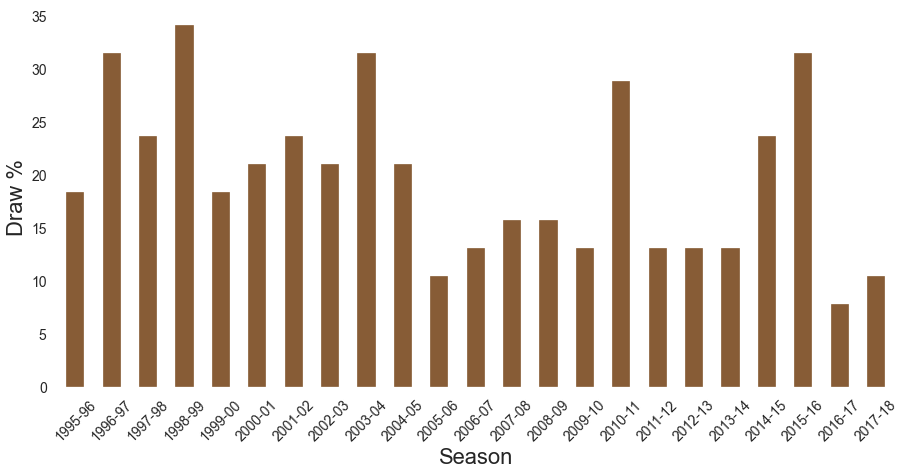

In [ ]:
winner_draw_perc_over_seasons.plot(kind='bar',figsize=(15,7), color='#875C36', fontsize=14, yticks=range(0,40,5))
plt.xticks(rotation=45)
plt.xlabel('Season',fontsize=22)
plt.ylabel('Draw %',fontsize=22)

### <b style="color:#941AB1;">What is relation between GF and GA v/s winners across seasons?</b>

In [ ]:
#For highest GF and 2nd highest vs winner
winner_GF_over_seasons=pd.Series(index=Yearly_PT_Srs.index,dtype='float64')
for year,i in zip(Yearly_PT_Srs,range(0,23)):
    if year.index[0] in year.GF.nlargest(2):
        winner_GF_over_seasons[i]=1
    else:
        winner_GF_over_seasons[i]=0.5

In [ ]:
#For least goals conceded vs winner
winner_GA_over_seasons=pd.Series(index=Yearly_PT_Srs.index,dtype='float64')
for year,i in zip(Yearly_PT_Srs,range(0,23)):
    if year.index[0] in year.GA.nsmallest(2):
        winner_GA_over_seasons[i]=1
    else:
        winner_GA_over_seasons[i]=0.5

Text(0, 0.5, '')

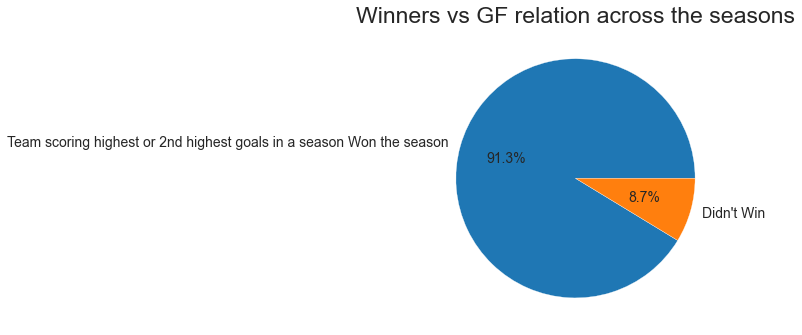

In [ ]:
labels=['Team scoring highest or 2nd highest goals in a season Won the season','Didn\'t Win']
winner_GF_over_seasons.value_counts(normalize=True).plot(kind='pie',labels=labels,textprops={'fontsize': 14},autopct='%1.1f%%')
plt.title('Winners vs GF relation across the seasons',fontsize=23)
plt.ylabel('')

Text(0.5, 1.0, 'Winners vs GA realation across the seasons')

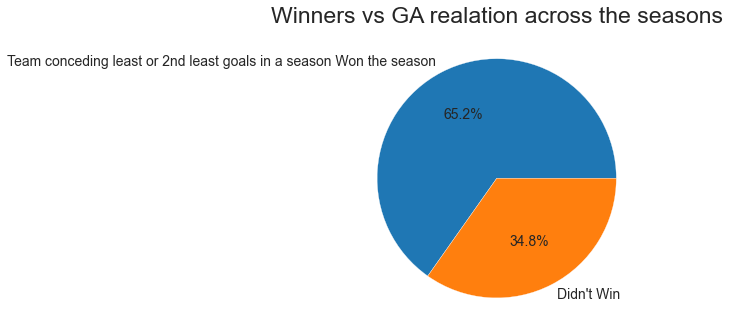

In [ ]:
labels=['Team conceding least or 2nd least goals in a season Won the season','Didn\'t Win']
winner_GA_over_seasons.value_counts(normalize=True).plot(kind='pie',labels=labels,textprops={'fontsize': 14},autopct='%1.1f%%')
plt.ylabel('')
plt.title('Winners vs GA relation across the seasons',fontsize=23)

### <b style="color:#009900;">Insights</b>
<li>If a team has highest GF (goals scored by a team in entire season) or 2nd highest, it won the league 91% of time</li>
<li>There are only two occurences going against above notion, one in 97-98 and other 15-16</li>
<li>The GF notion didn't hold true for least GA</li>

### <b style="color:#941AB1;">How did Season Champions perform on Matchday 1</b>

In [ ]:
winners_matchday1=pd.Series(dtype='str',index=points_table_index,name='Season Champion\'s Matchday-1 Result')

In [ ]:
for i,j in zip(df_epl.Season.unique(),winners_list):
    season_curr=Season_wise_df.get_group(str(i))
    m=season_curr[(season_curr.iloc[:,0]==j) |(season_curr.iloc[:,1]==j)].iloc[0,:]
    if m.FTR=='D' or (m.HomeTeam==j and m.FTR=='H') or (m.AwayTeam==j and m.FTR=='A'): winners_matchday1[i]='Win/Draw'
    else: winners_matchday1[i]='Lost'

Text(0, 0.5, '')

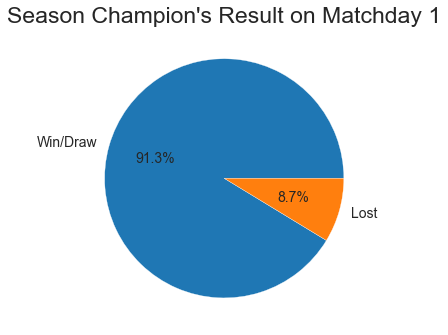

In [ ]:
winners_matchday1.value_counts(normalize=True).plot(kind='pie',textprops={'fontsize': 14},autopct='%1.1f%%')
plt.title('Season Champion\'s Result on Matchday 1',fontsize=23)
plt.ylabel('')

### <b style="color:#009900;">Insights</b>
<li>The season champions didn't loose their first match of the season in 21 of 23 seasons</li>

### <b style="color:#941AB1;">How did Season Champions perform 1st Home Game</b>

In [ ]:
winners_first_homematch=pd.Series(dtype='str',index=points_table_index)

In [ ]:
for i,j in zip(df_epl.Season.unique(),winners_list):
    season_curr=Season_wise_df.get_group(str(i))
    m=season_curr[(season_curr.iloc[:,0]==j)].iloc[0,:]
    if m.FTR=='H' or m.FTR=='D': winners_first_homematch[i]='Win/Draw'
    else: winners_first_homematch[i]='Lost'

Text(0, 0.5, '')

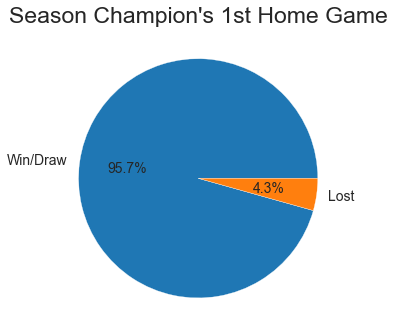

In [ ]:
winners_first_homematch.value_counts(normalize=True).plot(kind='pie',textprops={'fontsize': 14},autopct='%1.1f%%')
plt.title('Season Champion\'s 1st Home Game',fontsize=23)
plt.ylabel('')

### <b style="color:#009900;">Insights</b>
<li>The season champions didn't loose their first home game of the season in 22 of 23 seasons</li>

### <b style="color:#941AB1;">Points of bottom 3 teams (relegated)</b>

In [ ]:
Seasonswise_Points_Table.groupby(['Season'])['Pts'].nth(16).median()

38.0

Text(0.5, 1.0, 'Points of relegated teams across the seasons')

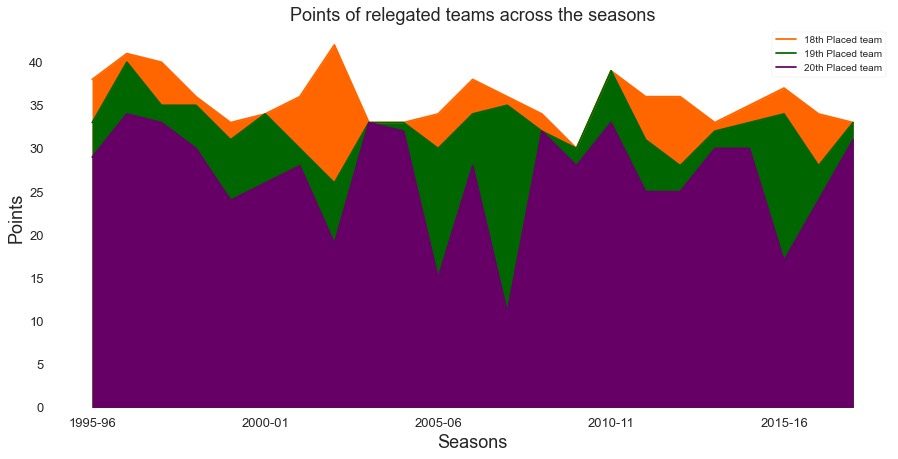

In [ ]:
Seasonswise_Points_Table.groupby(['Season'])['Pts'].nth(17).plot(kind='area', figsize=(15, 7), color='#ff6600')
Seasonswise_Points_Table.groupby(['Season'])['Pts'].nth(18).plot(kind='area', figsize=(15, 7), color='#006600')
Seasonswise_Points_Table.groupby(['Season'])['Pts'].nth(19).plot(kind='area', figsize=(15, 7), color='#660066',grid=0, fontsize=13)
plt.legend(labels=('18th Placed team', '19th Placed team','20th Placed team'))
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Points', fontsize=18)
plt.title('Points of relegated teams across the seasons', fontsize=18)

### <b style="color:#009900;">Insights</b>
<li>The median of 17th placed (team which had least points among teams who were not relegated) is 38 points</li>

### <b style="color:#941AB1;">GA of bottom 3 teams (relegated)</b>

In [ ]:
Seasonswise_Points_Table.groupby(['Season'])['GA'].nth(16).mean()

58.82608695652174

Text(0.5, 1.0, 'Goals Against of relegated teams across the seasons')

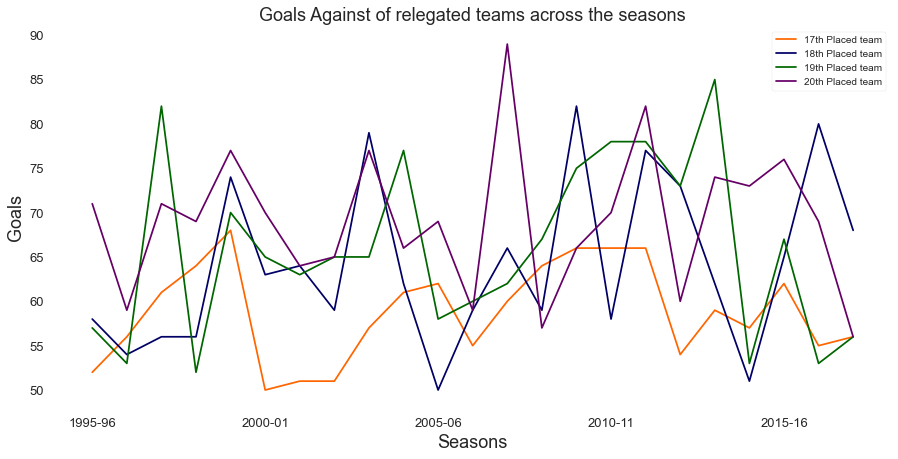

In [ ]:
Seasonswise_Points_Table.groupby(['Season'])['GA'].nth(16).plot(kind='line', figsize=(15, 7), color='#ff6600')
Seasonswise_Points_Table.groupby(['Season'])['GA'].nth(17).plot(kind='line', figsize=(15, 7), color='#000066')
Seasonswise_Points_Table.groupby(['Season'])['GA'].nth(18).plot(kind='line', figsize=(15, 7), color='#006600')
Seasonswise_Points_Table.groupby(['Season'])['GA'].nth(19).plot(kind='line', figsize=(15, 7), color='#660066',grid=0, fontsize=13)
plt.legend(labels=('17th Placed team','18th Placed team', '19th Placed team','20th Placed team'))
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Goals', fontsize=18)
plt.title('Goals Against of relegated teams across the seasons', fontsize=18)

### <b style="color:#009900;">Insights</b>
<li>The 17th placed (team which had least points among teams who were not relegated) has conceded 59 goals on average across seasons</li>

### <b style="color:#941AB1;">Home Loss % of winners</b>

In [ ]:
winner_home_loss_perc=pd.Series()
for (i,j),k in zip(Points_Table_Home.groupby('Season'),winners_list):winner_home_loss_perc[i]=j.loc[k,'L']*100/j.loc[k,'MP']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


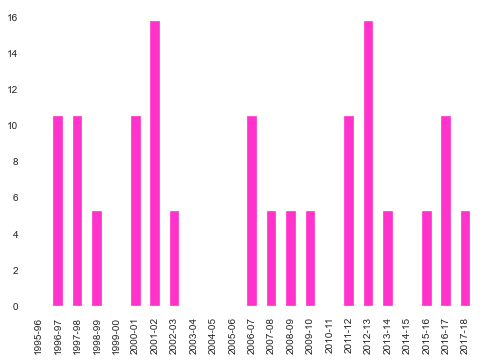

In [ ]:
winner_home_loss_perc.plot(kind='bar',color='#ff33cc')

In [ ]:
winner_home_win_perc.mean()

5.9496567505720845

### <b style="color:#009900;">Insights</b>
<li>Season winners lost only 6% of Home matches on average</li>

### <b style="color:#941AB1;">Home Goals of winners</b>

In [ ]:
winner_home_goals=pd.Series()

for (i,j),k in zip(Points_Table_Home.groupby('Season'),winners_list):winner_home_goals[i]=j.loc[k,'GF']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


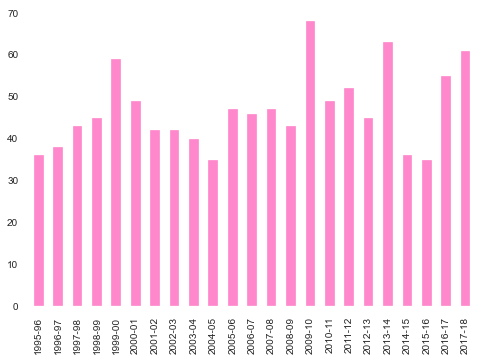

In [ ]:
winner_home_goals.plot(kind='bar',color='#ff88cc')

In [ ]:
winner_home_goals.median()

45.0

### <b style="color:#009900;">Insights</b>
<li>Season winners scored 45 goals at home over the season on average</li>

### <b style="color:#941AB1;">Point of winners</b>

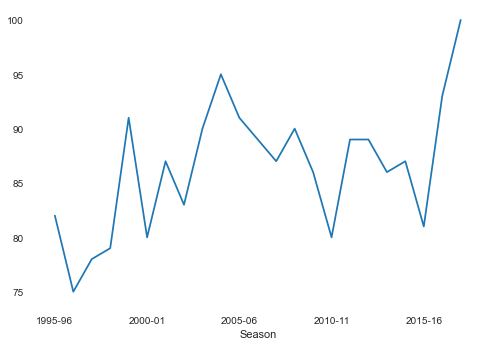

In [ ]:
Points_Table_Full_Season.groupby('Season').first().Pts.plot(kind='line')

In [ ]:
Points_Table_Full_Season.groupby('Season').first().Pts.median()

87.0

### <b style="color:#009900;">Insights</b>
<li>Winners scored on average 87 points</li>

### <b style="color:#941AB1;">Winners Loosing Streak</b>

In [ ]:
winner_loosing_streak=pd.Series(dtype='int16')

for (gname,season),winnr in zip(Season_wise_df,winners_list):
    max_l_streak=loosing_streak=0
    for game in season[(season.HomeTeam==winnr) | (season.AwayTeam==winnr)].iloc:
        if (game.HomeTeam==winnr and game.FTR=='A') or (game.AwayTeam==winnr and game.FTR=='H'):loosing_streak+=1
        elif loosing_streak>max_l_streak:
            max_l_streak=loosing_streak
            loosing_streak=0
        else:loosing_streak=0
    winner_loosing_streak[gname]=max_l_streak

In [ ]:
del gname,winnr,max_l_streak,loosing_streak,season

Text(0.5, 1.0, 'Max Loosing streak of season champions in that season')

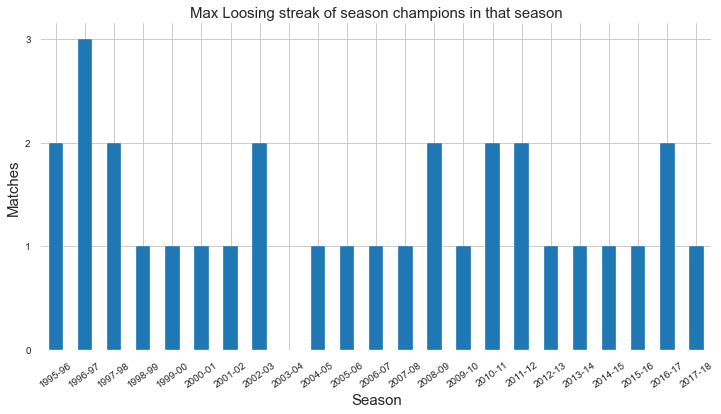

In [ ]:
winner_loosing_streak.plot(kind='bar',yticks=np.arange(0,4),grid=True,figsize=(12,6))
plt.xlabel('Season',fontsize=15)
plt.xticks(rotation=35,fontsize=10)
plt.ylabel('Matches',fontsize=15)
plt.title('Max Loosing streak of season champions in that season',fontsize=15)

### <b style="color:#009900;">Insights</b>
<li>The winners of a season never lost more than 2 matches continuously except in 1 of last 23 seasons</li>

### <b style="color:#941AB1;">Performance of never relegated teams</b>

In [ ]:
points_table_never_relegated_teams=pd.DataFrame(index=never_relegated_teams)

In [ ]:
for team in never_relegated_teams:
    for season in Points_Table_Full_Season.Season.unique():
        points_table_never_relegated_teams.loc[team,season]=Points_Table_Full_Season.groupby('Season').get_group(season).loc[team,'Pts']

Text(0.5, 1.0, 'Points of never relgated teams over the seasons')

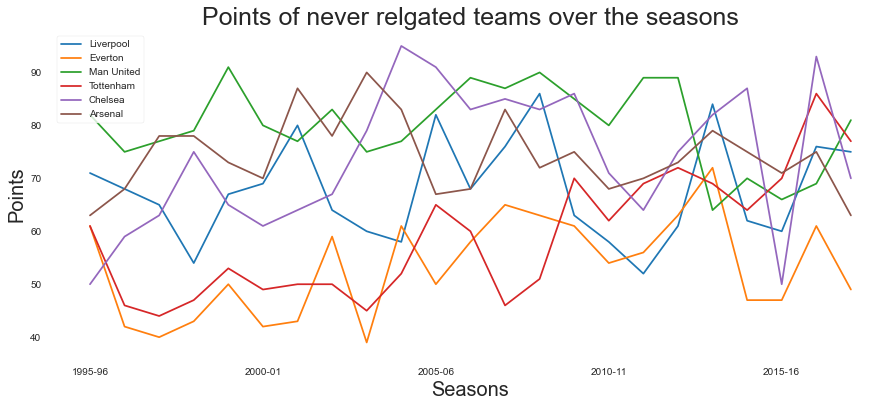

In [ ]:
for team in never_relegated_teams:
    points_table_never_relegated_teams.loc[team,:].plot(kind='line',figsize=(15,6))
plt.legend(never_relegated_teams)
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Points',fontsize=20)
plt.title('Points of never relgated teams over the seasons',fontsize=25)

### <b style="color:#009900;">Insights</b>
<li>Manchester Uniteds performance in the recent years has declined</li>
<li>The teams points are very close in the recent years unlike in early years where they had some difference</li>

### <b style="color:#941AB1;">Performance of top 10 teams of that season</b>

In [ ]:
top_10_team_points=pd.DataFrame(index=['1st Place Team','2nd Place Team','3rd Place Team','4th Place Team','5th Place Team','6th Place Team','7th Place Team','8th Place Team','9th Place Team','10th Place Team'])

In [ ]:
for season in Points_Table_Full_Season.Season.unique():
        top_10_team_points.loc[:,season]=np.array(Points_Table_Full_Season.groupby('Season').get_group(season).iloc[:10,7])

Text(0.5, 1.0, 'Points of top 10 teams over the seasons')

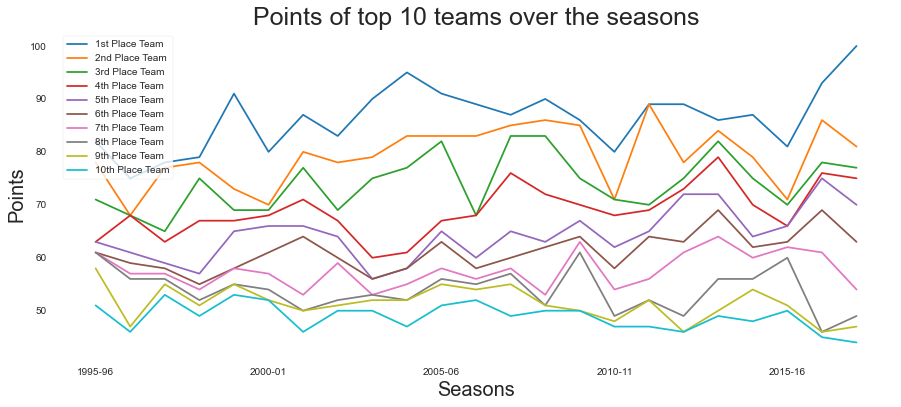

In [ ]:
for team in top_10_team_points.index:
    top_10_team_points.loc[team,:].plot(kind='line',figsize=(15,6))
plt.legend(top_10_team_points.index)
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Points',fontsize=20)
plt.title('Points of top 10 teams over the seasons',fontsize=25)

### <b style="color:#941AB1;">Performance of bottom 5 teams of that season</b>

In [ ]:
bottom_5_team_points=pd.DataFrame(index=['16th Place Team','17th Place Team','18th Place Team','19th Place Team','20th Place Team'])

In [ ]:
for season in Points_Table_Full_Season.Season.unique():
        bottom_5_team_points.loc[:,season]=np.array(Points_Table_Full_Season.groupby('Season').get_group(season).iloc[-5:20,7])

Text(0.5, 1.0, 'Points of bottom 5 teams over the seasons')

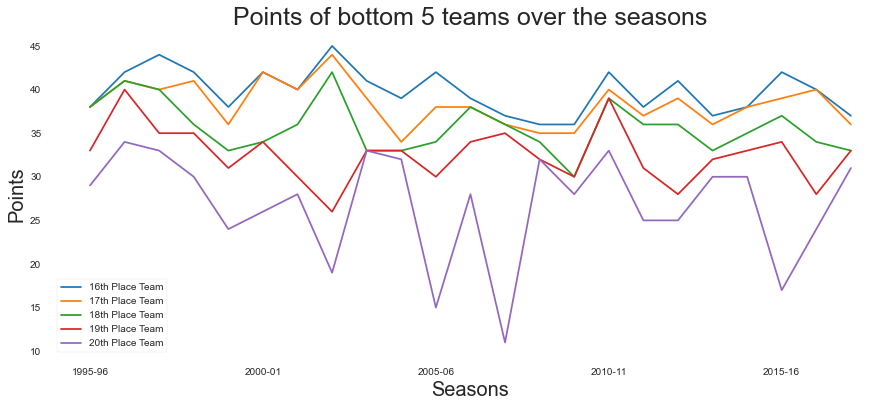

In [ ]:
for team in bottom_5_team_points.index:
    bottom_5_team_points.loc[team,:].plot(kind='line',figsize=(15,6))
plt.legend(bottom_5_team_points.index)
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Points',fontsize=20)
plt.title('Points of bottom 5 teams over the seasons',fontsize=25)

### <b style="color:#941AB1;">Home vs Away Goals scored across seasons</b>

Text(0.5, 1.0, 'Goals scored over the seasons')

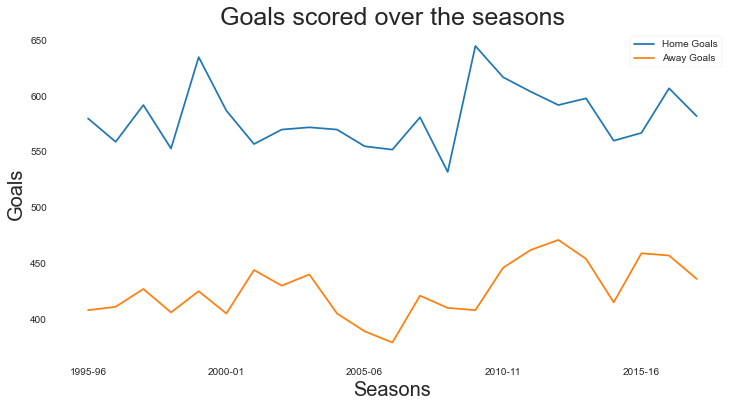

In [ ]:
Points_Table_Home.groupby('Season')['GF'].sum().plot(kind='line',figsize=(12,6))
Points_Table_Away.groupby('Season')['GF'].sum().plot(kind='line',figsize=(12,6))
plt.legend(['Home Goals','Away Goals'])
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Goals',fontsize=20)
plt.title('Goals scored over the seasons',fontsize=25)

Text(0.5, 1.0, 'Goals scored over the seasons')

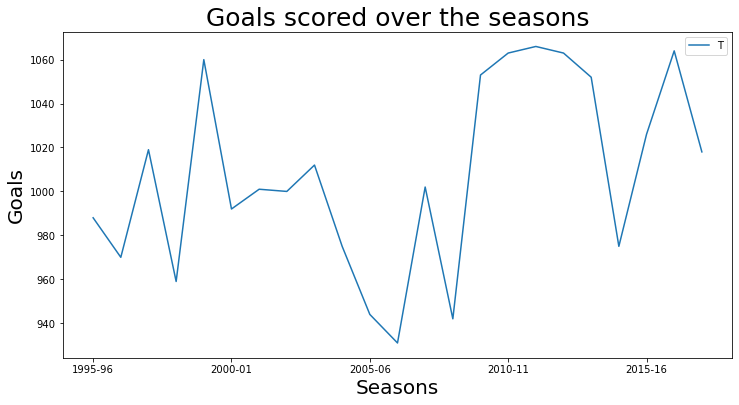

In [ ]:
(Points_Table_Full_Season.groupby('Season')['GF'].sum()).plot(kind='line',figsize=(12,6))
plt.legend('Total Goals')
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Goals',fontsize=20)
plt.title('Goals scored over the seasons',fontsize=25)

### <b style="color:#009900;">Insights</b>
<li>It can be clearly seen that teams tend to score more goals at home.</li>
<li>This clearly shows home advantage</li>

### <b style="color:#941AB1;">Half Time Goals scored across seasons</b>

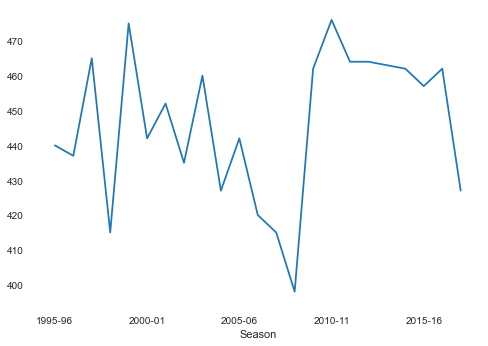

In [ ]:
(Season_wise_df['HTHG'].sum()+Season_wise_df['HTAG'].sum()).plot(kind='line')

### <b style="color:#941AB1;">If home loss % is less than 5%, have the team won the league</b>

In [ ]:
Seasonwise_home_table=Points_Table_Home.groupby('Season')

In [ ]:
teams_with_home_win_perc_less_5=pd.Series(index=df_epl.Season.unique())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
for season,winnr in zip(df_epl.Season.unique(),winners_list):
    season_table=Seasonwise_home_table.get_group(season)
    teams_with_home_win_perc_less_5[season]=winnr in season_table[(season_table.L/season_table.MP)<0.1].index
    

### <b style="color:#941AB1;">Home vs Away win % over seasons</b>

In [ ]:
temp_home_win_perc=Season_wise_df.apply(lambda row : (row.FTR=='H')).groupby('Season').value_counts()
season_wise_home_win_perc=temp_home_win_perc[:,1]*100/(temp_home_win_perc[:,0]+temp_home_win_perc[:,1])

In [ ]:
temp_away_win_perc=Season_wise_df.apply(lambda row : (row.FTR=='A')).groupby('Season').value_counts()
season_wise_away_win_perc=temp_away_win_perc[:,1]*100/(temp_away_win_perc[:,0]+temp_away_win_perc[:,1])

Text(0.5, 1.0, 'Home vs Away Win%')

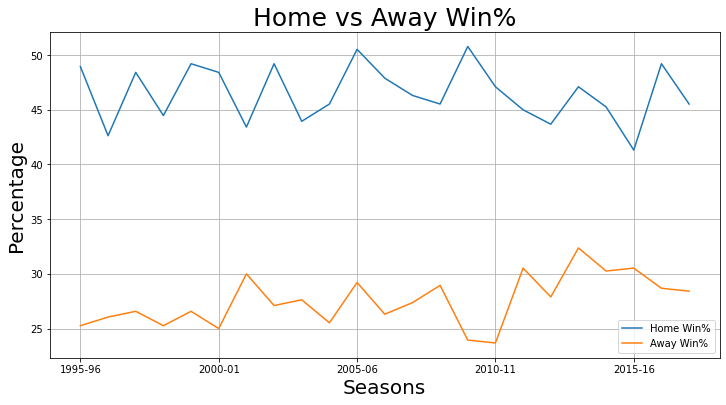

In [ ]:
season_wise_home_win_perc.plot(kind='line',figsize=(12,6))
season_wise_away_win_perc.plot(kind='line',figsize=(12,6),grid=True)
plt.legend(['Home Win%','Away Win%','Draw Win%'])
plt.xlabel('Seasons',fontsize=20)
plt.ylabel('Percentage',fontsize=20)
plt.title('Home vs Away Win%',fontsize=25)

### <b style="color:#009900;">Insights</b>
<li>It can be clearly seen that teams tend to win more at home.</li>
<li>This clearly shows home advantage</li>

### <b style="color:#941AB1;">How many times have champions comeback after halftime</b>

### <b style="color:#941AB1;">Have winners ever lost after leading in halftime</b>

In [ ]:
winner_HT_to_FT=pd.Series(dtype='int16')
somedict={'HomeTeam':'A','AwayTeam':'H'}
dict2={'HomeTeam':'H','AwayTeam':'A'}
for (gname,season),winnr in zip(Season_wise_df,winners_list):
    lose_in_FT_after_leading_in_HT=0
    for match in season[(season.HomeTeam==winnr) | (season.AwayTeam==winnr)].iloc:
        if match.FTR==somedict[match[match==winnr].index[0]] and match.HTR==dict2[match[match==winnr].index[0]]:
            lose_in_FT_after_leading_in_HT+=1
    winner_HT_to_FT[gname]=lose_in_FT_after_leading_in_HT

Text(0.5, 1.0, 'Winners of the season loosing matches after leading at half time')

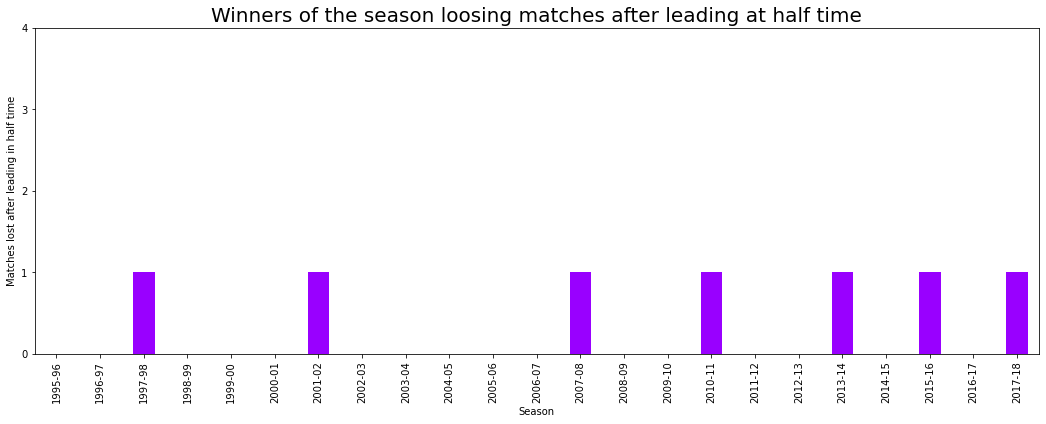

In [ ]:
winner_HT_to_FT.plot(kind='bar',figsize=(18,6),yticks=np.arange(0,5),color='#9900ff')
plt.xlabel('Season')
plt.ylabel('Matches lost after leading in half time')
plt.title('Winners of the season loosing matches after leading at half time',fontsize=20)

In [ ]:
winner_HTFT=pd.Series(dtype='int16')
somedict={'HomeTeam':'A','AwayTeam':'H'}
dict2={'HomeTeam':'H','AwayTeam':'A'}
total_winner_matches=0
lose_in_FT_after_leading_in_HT=0
for (gname,season),winnr in zip(Season_wise_df,winners_list):
    for match in season[(season.HomeTeam==winnr) | (season.AwayTeam==winnr)].iloc:
        if match.FTR==dict2[match[match==winnr].index[0]] and match.HTR==dict2[match[match==winnr].index[0]]:
            total_winner_matches+=1
        if match.FTR==somedict[match[match==winnr].index[0]] and match.HTR==dict2[match[match==winnr].index[0]]:
            lose_in_FT_after_leading_in_HT+=1
winner_HTFT['Lost after Leading at HT']=lose_in_FT_after_leading_in_HT
winner_HTFT['Wins after leading at HT']=total_winner_matches

Text(0.5, 1.0, 'Winners win vs lost after leading at Half Time')

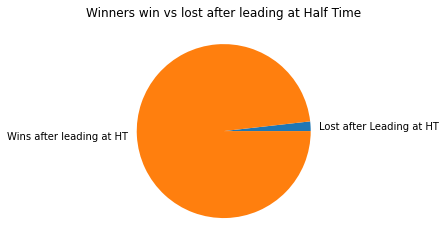

In [ ]:
winner_HTFT.plot(kind='pie')
plt.ylabel('')
plt.title('Winners win vs lost after leading at Half Time')

### <b style="color:#009900;">Insights</b>
<li>Season Champions have hardly lost any matches after leading at halftime</li>

### <b style="color:#941AB1;">Top 4 finishes/Title Won by team</b>

In [ ]:
winner_team_count=Points_Table_Full_Season.groupby('Season').head(1).index.value_counts()
top_4_teams_count=Points_Table_Full_Season.groupby('Season').head(4).index.value_counts()
for i in top_4_teams_count.index:
    if i not in winner_team_count.index:winner_team_count[i]=0

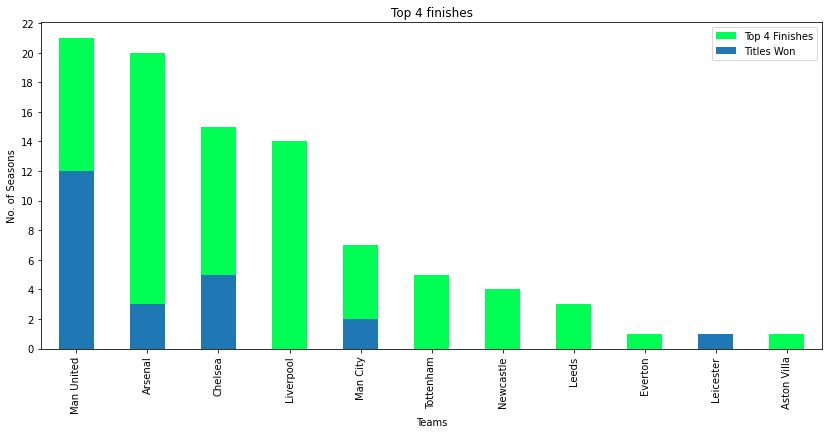

In [ ]:
top_4_teams_count.plot(kind='bar',yticks=np.arange(0,23,2),figsize=(14,6),color='#00ff55')
winner_team_count[top_4_teams_count.index].plot(kind='bar')
plt.xlabel('Teams')
plt.ylabel('No. of Seasons')
plt.title('Top 4 finishes')
plt.legend(['Top 4 Finishes','Titles Won'])

### <b style="color:#009900;">Insights</b>
<li>Arsenal have almost same top 4 finishes as Man United but have won a quarter of titles compared to them</li>
<li>Liverpool have never the league in 23 seasons despite finishing top 4 in 14 seasons</li>

### <b style="color:#941AB1;">Tottenham Goals and Points over the seasons</b>

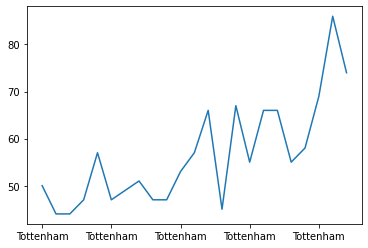

In [ ]:
Points_Table_Full_Season.groupby(Points_Table_Full_Season.index).get_group('Tottenham').GF.plot(kind='line')

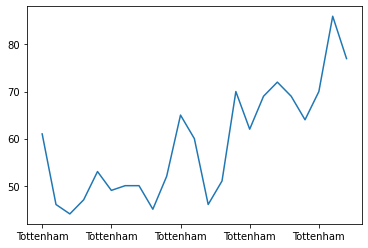

In [ ]:
Points_Table_Full_Season.groupby(Points_Table_Full_Season.index).get_group('Tottenham').Pts.plot(kind='line')

### <b style="color:#009900;">Insights</b>
<li>Tottenham have improved over the years</li>

### <b style="color:#941AB1;">Manchester Teams over the seasons</b>

In [ ]:
manc_pts=pd.Series(dtype='int16')
manc_gf=pd.Series(dtype='int16')
for season in Points_Table_Full_Season.groupby('Season'):
    if 'Man City'  not in season[1].Pts.index:
        manc_pts[season[0]]=0
        manc_gf[season[0]]=0
    else:
        manc_pts[season[0]]=season[1].Pts['Man City']
        manc_gf[season[0]]=season[1].GF['Man City']

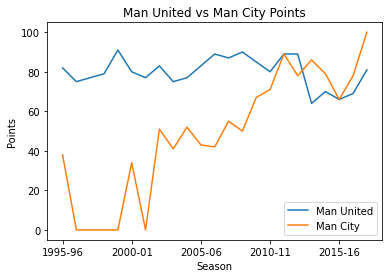

In [ ]:
Points_Table_Full_Season.groupby(Points_Table_Full_Season.index).get_group('Man United').Pts.plot(kind='line')
manc_pts.plot(kind='line')
plt.title('Man United vs Man City Points')
plt.xlabel('Season')
plt.ylabel('Points')
plt.legend(['Man United','Man City'])

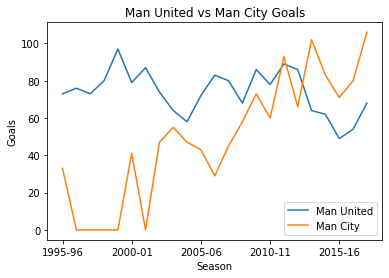

In [ ]:
Points_Table_Full_Season.groupby(Points_Table_Full_Season.index).get_group('Man United').GF.plot(kind='line')
manc_gf.plot(kind='line')
plt.title('Man United vs Man City Goals')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(['Man United','Man City'])

### <b style="color:#009900;">Insights</b>
<li>Man City has caught up with Man United and infact crossed Man United in the recent years</li>

### <b style="color:#941AB1;">Which month has seen highest goals</b>

In [ ]:
goals_by_month=df_epl.groupby(df_epl['Date'].dt.strftime('%B'))[['FTHG','FTAG']].sum().sum(axis=1)

Text(0.5, 1.0, 'Goals Scored by Month')

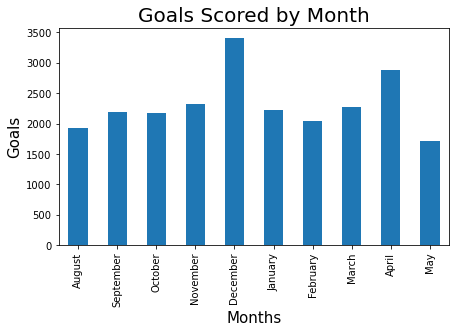

In [ ]:
goals_by_month=goals_by_month[['August','September','October','November','December','January','February','March','April','May']]
goals_by_month.plot(kind='bar',figsize=((7,4)))
plt.xlabel('Months',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.title('Goals Scored by Month',fontsize=20)

Text(0.5, 1.0, 'Goals Scored by Month')

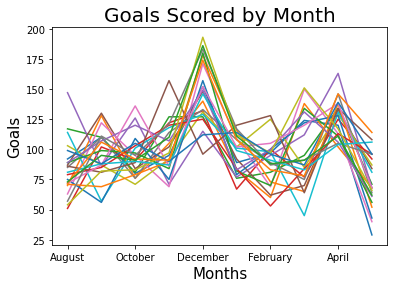

In [ ]:
for i in df_epl.Season.unique():
    Season_wise_df.get_group(i).groupby(df_epl['Date'].dt.strftime('%B'))[['FTHG','FTAG']].sum().sum(axis=1)[['August','September','October','November','December','January','February','March','April','May']].plot(kind='line')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.title('Goals Scored by Month',fontsize=20)

### <b style="color:#009900;">Insights</b>
<li>December Traditionally has seen most no. of goals scored</li>
<li>Reason: December has eased champions league schedule</li>
<li>This can be due to the fact that by December teams have their team set after season begins in Aug and players are still motivated, fresh as the season is still in early months</li>

### <b style="color:#941AB1;">What are the goals scored by different fixtures</b>

In [ ]:
fixture_goals=np.zeros((df_epl.HomeTeam.nunique(),df_epl.HomeTeam.nunique()),dtype='int8')
TeamDict = {k:v for k,v in zip(sorted(df_epl.HomeTeam.unique()),np.arange(df_epl.HomeTeam.nunique()))}
for match in df_epl.iloc:
    fixture_goals[TeamDict[match.HomeTeam]][TeamDict[match.AwayTeam]]+=(match.FTHG+match.FTAG)

In [ ]:
fixture_goals=pd.DataFrame(fixture_goals,index=sorted(df_epl.HomeTeam.unique()),columns=sorted(df_epl.HomeTeam.unique()))
g_t=fixture_goals[fixture_goals.median(axis=1)>7].index

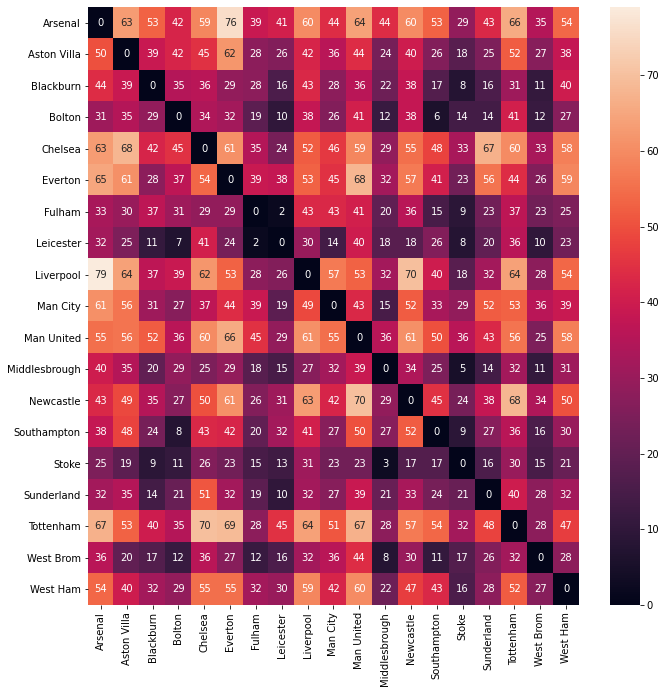

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(fixture_goals.loc[g_t,g_t],annot=True)

### <b style="color:#009900;">Insights</b>
<li>Fixtures that generated a lot of goals are Liv vs Ars, Ars vs Eve, Tott vs Che, New vs ManU</li>

### <b style="color:#941AB1;">Goals scored by season</b>

Text(0.5, 1.0, 'Away Goals')

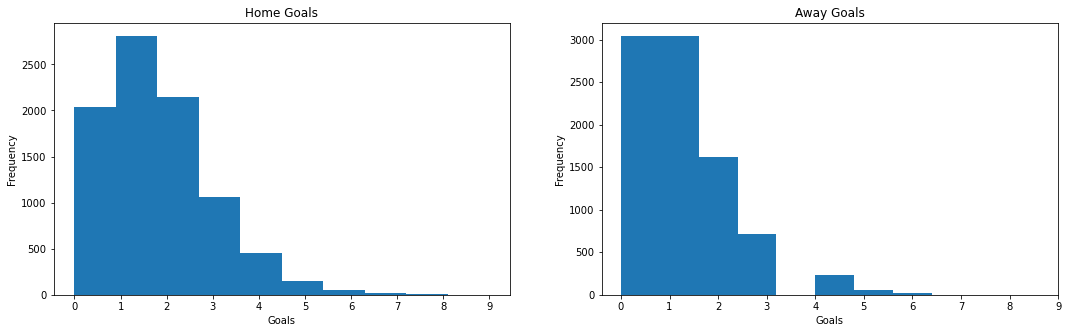

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df_epl.FTHG.plot(kind='hist',ax=ax1,figsize=(18,5))
df_epl.FTAG.plot(kind='hist',ax=ax2,figsize=(18,5))
ax1.set_xticks(np.arange(0,10));ax2.set_xticks(np.arange(0,10))
ax1.set_xlabel('Goals');ax2.set_xlabel('Goals')
ax1.set_title('Home Goals')
ax2.set_title('Away Goals')

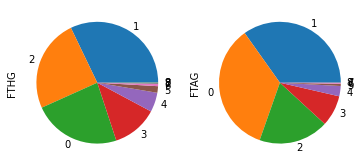

In [ ]:
fig, ax = plt.subplots(1, 2)
df_epl.FTHG.value_counts().plot(kind='pie',ax=ax[0])
df_epl.FTAG.value_counts().plot(kind='pie',ax=ax[1])

### <b style="color:#009900;">Insights</b>
<li>Home Goals are peaked towards 1 goal</li>
<li>Away Goals are peaked towards 0 & 1 goal</li>

### <b style="color:#941AB1;">Matches played, win, drew</b>

Text(0, 0.5, 'Matches')

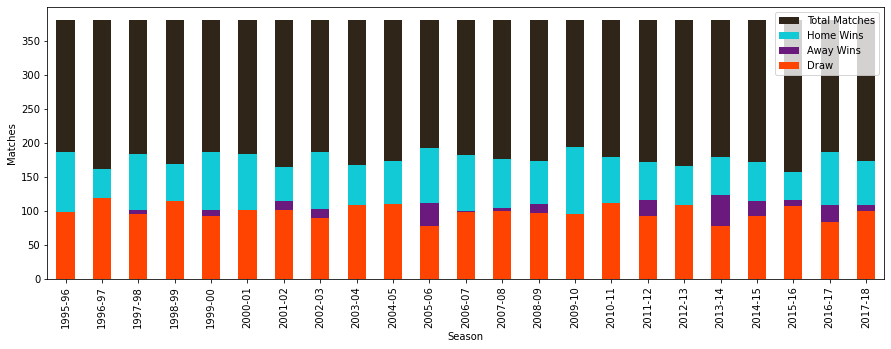

In [ ]:
Season_wise_df.FTR.count().plot(kind='bar',color='#2f2519')
Season_wise_df.FTR.apply(lambda x : x[x=='H'].count()).plot(kind='bar',color='#12cad6')
Season_wise_df.FTR.apply(lambda x : x[x=='A'].count()).plot(kind='bar',color='#6a197d')
Season_wise_df.FTR.apply(lambda x : x[x=='D'].count()).plot(kind='bar',color='#ff4301',figsize=(15,5))
plt.legend(['Total Matches','Home Wins','Away Wins','Draw'])
plt.ylabel('Matches')

### <b style="color:#009900;">Insights</b>
<li>Home Wins have greater  than away in every season</li>
<li>In the earlier seasons, the away wins used to be rare than draws which not the case in last 5 seasons</li>

### <b style="color:#941AB1;">Team wise HG & AG mean</b>

In [ ]:
HA_mean_goals=pd.DataFrame([df_epl.groupby('HomeTeam')['FTHG'].mean(),df_epl.groupby('AwayTeam')['FTAG'].mean()]).T

In [ ]:
fig=px.scatter(HA_mean_goals,x='FTHG',y='FTAG',color='FTAG',hover_name=HA_mean_goals.index)
fig.update_layout(
    title="Home/Away Goals Mean by Team",
    xaxis_title="Home Goals Mean",
    yaxis_title="Away Goals Mean",
    font=dict(
        family="Calibri",
        size=18))
fig.show()

### <b style="color:#009900;">Insights</b>
<li>Man U has the highest average goals scored</li>
<li>Although Arsenal are a close they have just won 1 title in 23 seasons compared Man U's 12 titles in 23 seasons</li>
<li>This highlights Arsenals defence problem</li>

### <b style="color:#941AB1;">Match Results</b>

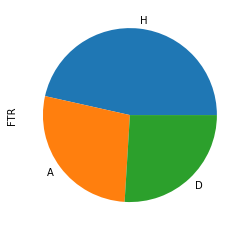

In [ ]:
df_epl.FTR.value_counts().plot(kind='pie')

### <b style="color:#009900;">Insights</b>
<li>Almost 50% matches end in Home Team Win</li> 

### <b style="color:#941AB1;">Team with most relegations</b>

Text(0.5, 1.0, 'Relegations by team')

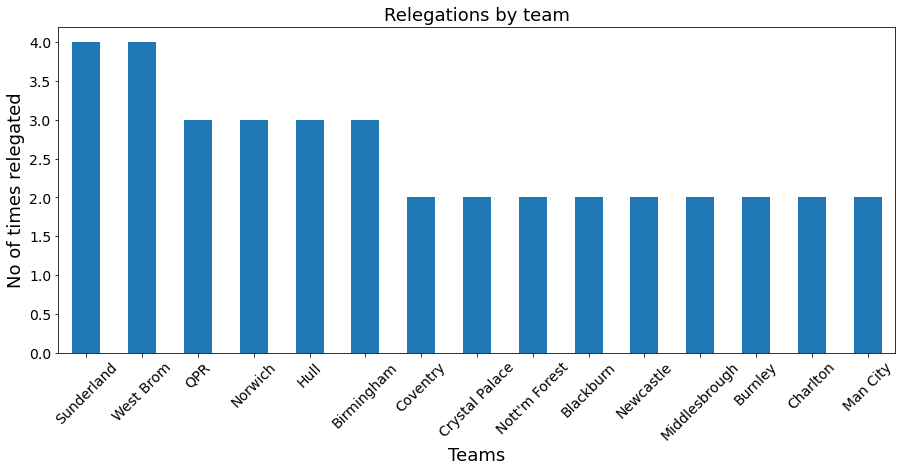

In [ ]:
Points_Table_Full_Season.groupby('Season').tail(3).index.value_counts().head(15).plot(kind='bar',figsize=(15,6))
plt.xlabel('Teams',fontsize=18)
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('No of times relegated',fontsize=18)
plt.title('Relegations by team',fontsize=18)

### <b style="color:#009900;">Insights</b>
<li>Sunderland and West Brom have been relegated most times</li>

### <b style="color:#941AB1;">Goals in first half vs second half</b>

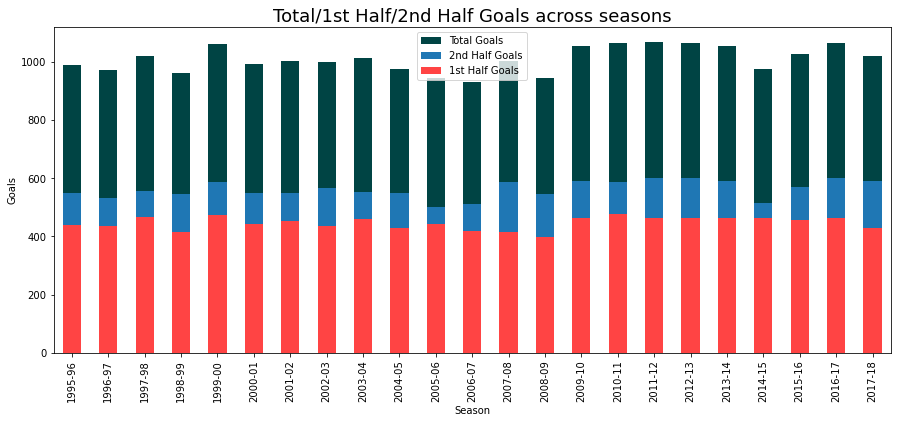

In [ ]:
(Season_wise_df.FTHG.sum()+Season_wise_df.FTAG.sum()).plot(kind='bar',color='#004444')
((Season_wise_df.FTHG.sum()-Season_wise_df.HTHG.sum())+(Season_wise_df.FTAG.sum()-Season_wise_df.HTAG.sum())).plot(kind='bar')
(Season_wise_df.HTHG.sum()+Season_wise_df.HTAG.sum()).plot(kind='bar',color='#ff4444',figsize=(15,6))
plt.title('Total/1st Half/2nd Half Goals across seasons',fontsize=18)
plt.ylabel('Goals')
plt.legend(['Total Goals','2nd Half Goals','1st Half Goals'])

### <b style="color:#009900;">Insights</b>
<li>In all of the 23 seasons, 2nd half has always seen more goals than the 1st half</li>

### <b style="color:#941AB1;">Total Home Goals</b>

Text(0.5, 1.0, 'Total Home Goals')

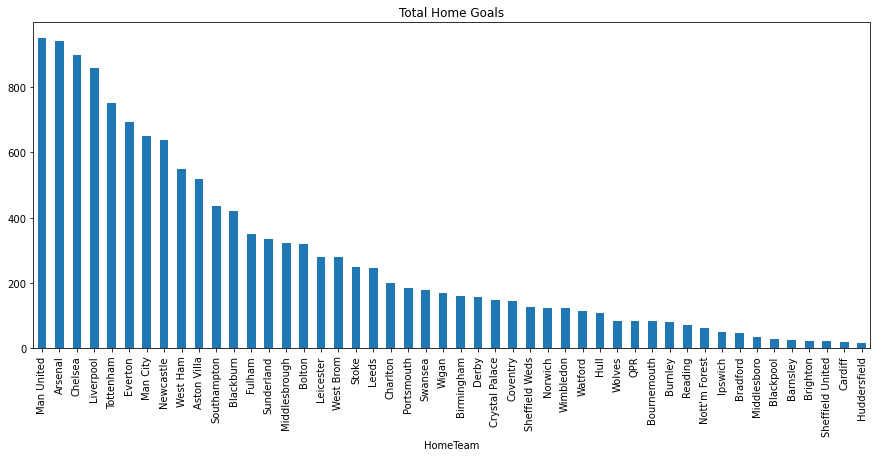

In [ ]:
df_epl.groupby('HomeTeam').FTHG.sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,6))
plt.title('Total Home Goals')

Text(0.5, 1.0, 'Total Away Goals')

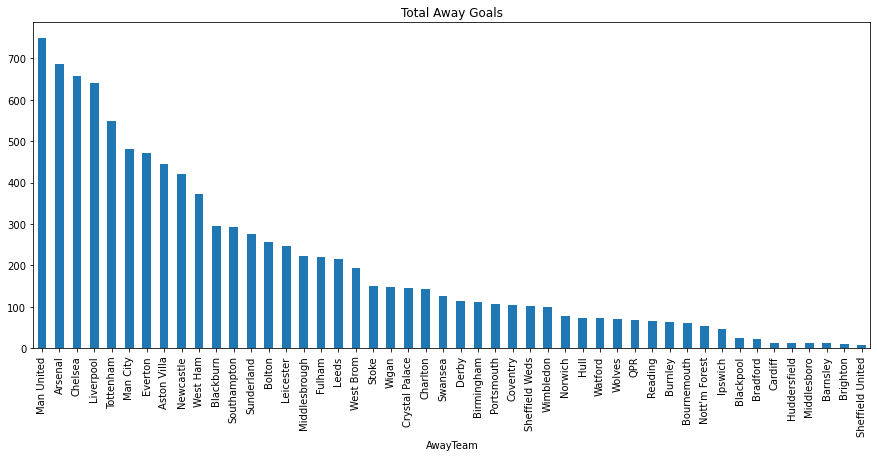

In [ ]:
df_epl.groupby('AwayTeam').FTAG.sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,6))
plt.title('Total Away Goals')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

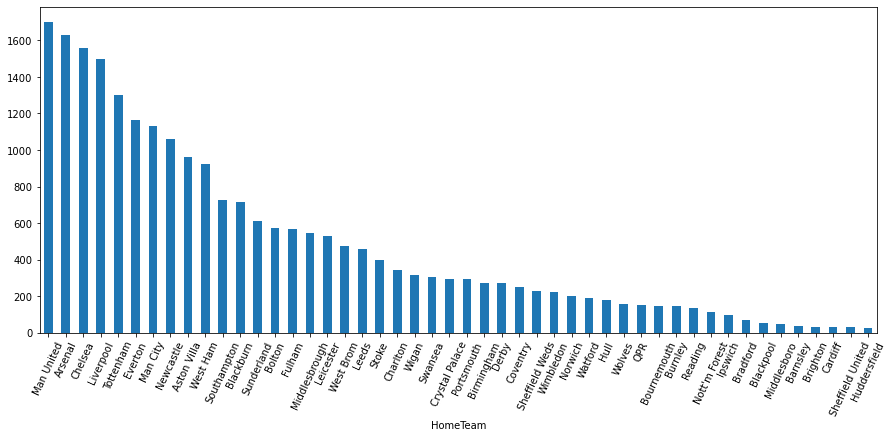

In [ ]:
(df_epl.groupby('HomeTeam').FTHG.sum()+df_epl.groupby('AwayTeam').FTAG.sum()).sort_values(ascending=False).plot(kind='bar',figsize=(15,6))
plt.xticks(rotation=65)